In [57]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt

In [65]:
scope_file = "measurements/uni_t_meas/coap_psm_5_min.txt"

#Getting the amount of points in each segment
data = pd.read_csv(scope_file, sep='\t', usecols=["Value"], decimal = "," , skiprows=range(1,366))

data

,Value
0,0.14
1,0.13
2,0.13
3,0.13
4,0.13
...,...
1440,0.13
1441,0.13
1442,0.13
1443,0.13


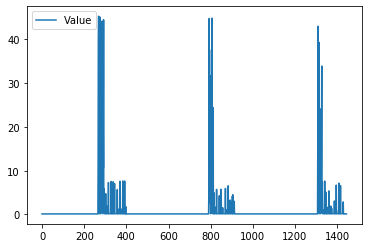

In [73]:
data.plot()